In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from Bio import SeqIO
plt.rcParams['pdf.fonttype'] = 42

In [2]:
nsp2="/rna/han/reference/proteome/coronavirus/human_coronavirus_nsp2.fa"
ma="/rna/han/reference/proteome/coronavirus/human_coronavirus_orf1ab_clustalw.fa"
fasta_sequences = SeqIO.parse(open(ma),'fasta')
virus = []
seq = []
for fasta in fasta_sequences:
    name,sequence=fasta.description,str(fasta.seq)
    virus.append(name)
    seq.append(sequence)
orf = pd.DataFrame({"virus":["SARS-CoV-2","SARS-CoV","MERS-CoV","HCoV-OC43",
                          "HCoV-HKU1","HCoV-229E","HCoV-NL63"],"sequence":seq})
orflen = len([x for x in orf.sequence[0] if x != "-"])

In [3]:
with open("/rna/han/__resources/miscellaneous/conservation/blosum62.txt","r") as f:
    lines=f.readlines()
    aa=lines[0].strip().split()
    blosum=np.array([[int(x) for x in lines[1].split("\n")[0].split()[1:]]])
    for i in range(1,20):
        blosum=np.vstack((blosum,[int(x) for x in lines[i+1].split("\n")[0].split()[1:]]))
change={}
for i in range(20):
    change[aa[i]]=i

In [4]:
ma = np.array([[s for s in seq] for seq in orf.sequence])
consensus = np.array(mode(ma)[0].tolist()[0])
sequence = orf.sequence

/tmp/ipykernel_692774/4044336859.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  consensus = np.array(mode(ma)[0].tolist()[0])
/tmp/ipykernel_692774/4044336859.py:3: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  consensus = np.array(mode(ma)[0].tolist()[0])


In [5]:
#Distance to CoV2
cov2 = ma[0]
heat = np.zeros(ma.shape)
for i in range(len(ma)):
    seq = sequence[i]
    for j in range(len(seq)):
        s, c = seq[j], cov2[j]
        if ((s == "-")&(c == "-")):
            heat[i, j] = 2
        elif ((s=="-")|(c == "-")):
            heat[i, j] = -4
        else:
            heat[i, j] = blosum[change[s], change[c]]

new=[]
n = 60
# n = 300
for line in heat[1:]:
    for _ in range(n):
        new.append(line)
new = np.array(new)

In [7]:
co2ma = []
c = 0
for i in range(len(ma[0])-1):
    if ma[0][i]!="-":
        co2ma.append(i)
len(co2ma)
# len(ma[0])
ma[0][co2ma[0]:co2ma[-1]+1]

array(['M', 'E', 'S', ..., 'V', 'N', 'N'], dtype='<U1')

[Text(0, 30, 'SARS-CoV'),
 Text(0, 90, 'MERS-CoV'),
 Text(0, 150, 'HCoV-OC43'),
 Text(0, 210, 'HCoV-HKU1'),
 Text(0, 270, 'HCoV-229E'),
 Text(0, 330, 'HCoV-NL63')]

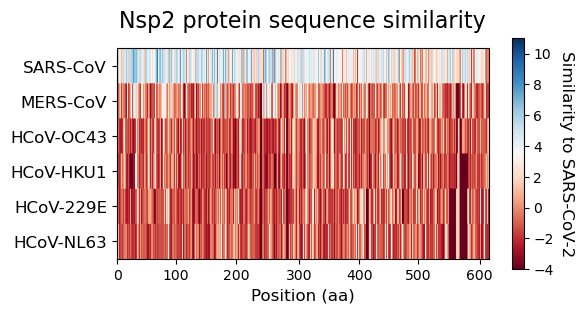

In [8]:
nsp2 = [180, 817]
fig, ax = plt.subplots(1, 1, figsize=[6, 3])
im = ax.imshow(new[:, nsp2[0] : nsp2[1]], cmap="RdBu")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Similarity to SARS-CoV-2", rotation=-90, va="bottom", fontsize=12)
ax.set_title("Nsp2 protein sequence similarity", fontsize=16, pad=15)
# ax.set_title("Sequence conservation",fontsize=16)
ax.set_xlabel("Position (aa)",fontsize=12)

ax.set_xticks([co2ma[nsp2[0] + i] - co2ma[nsp2[0]] for i in range(0, 601, 100)])
ax.set_xticklabels(range(0, 601, 100))
ax.tick_params(axis="x", labelsize=10)
ax.set_yticks(range(int(n / 2), int(13 / 2 * n), n))
ax.set_yticklabels(["SARS-CoV","MERS-CoV","HCoV-OC43",
                    "HCoV-HKU1","HCoV-229E","HCoV-NL63"], fontsize=12)

# plt.savefig('/rna/han/reference/proteome/coronavirus/human_coronavirus_nsp2_similarity.png', dpi=1000, bbox_inches = 'tight')
# plt.savefig('/rna/han/reference/proteome/coronavirus/human_coronavirus_nsp2_similarity.pdf', bbox_inches = 'tight')